In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/CS 464/bbcsports_train.csv')  
val_dataset = pd.read_csv('/content/drive/MyDrive/CS 464/bbcsports_val.csv')

In [ ]:
train_dataset

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
549,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
550,0,0,1,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
val_dataset

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,2
181,0,0,5,0,6,1,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
182,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
183,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


**Question 2.1**

In [ ]:
labels = train_dataset['class_label']

In [ ]:
class_0 = 0
class_1 = 0
class_2 = 0
class_3 = 0
class_4 = 0

for i in labels:
  if i == 0:
    class_0 += 1
  elif i == 1:
    class_1 += 1
  elif i == 2:
    class_2 += 1
  elif i == 3:
    class_3 += 1
  else:
    class_4 += 1

<BarContainer object of 5 artists>

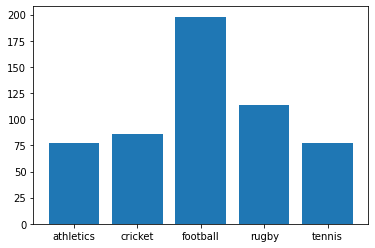

In [ ]:
#Question 2
value = [class_0, class_1, class_2, class_3, class_4]
label = ['athletics', 'cricket', 'football', 'rugby', 'tennis']
plt.bar(label, height=value)
#plt.xticks(label, value);


In [ ]:
labels_val = val_dataset['class_label']

In [ ]:
class_0 = 0
class_1 = 0
class_2 = 0
class_3 = 0
class_4 = 0

for i in labels_val:
  if i == 0:
    class_0 += 1
  elif i == 1:
    class_1 += 1
  elif i == 2:
    class_2 += 1
  elif i == 3:
    class_3 += 1
  else:
    class_4 += 1

<BarContainer object of 5 artists>

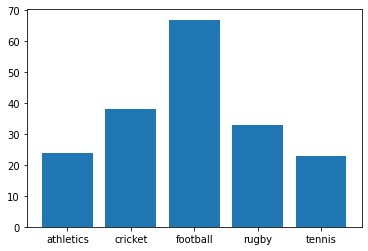

In [ ]:
value = [class_0, class_1, class_2, class_3, class_4]
label = ['athletics', 'cricket', 'football', 'rugby', 'tennis']
plt.bar(label, height=value)

**Question 2.2-2.3**

In [ ]:
def SeparateClasses(train):

  yk = [i for i in train['class_label'].unique()]  
  #total number of classes
  N = train['class_label'].size
  prior_list = []
  class_arr = []

  for i in yk:
    train_0 = train[train['class_label'] == i]
    Nk = train_0['class_label'].size
    prior_list.append(Nk/N)
    train_0 = train_0.drop(labels = ['class_label'], axis=1)
    train_0 = train_0.sum(axis=0)
    sum = np.sum(train_0)
    train_0 = pd.DataFrame(train_0)
    train_0 = train_0.T
    train_0['class_label'] = i
    train_0['summation'] = sum
    class_arr.append(train_0)

  return class_arr, prior_list, yk

In [ ]:
def MNB(class_list, prior_list, val_data, indexes, alpha):

  best_prob = -np.inf
  keep_index = 0
  predicted_labels = []
  col_size = val_data[0:1].size - 1 #4613
  row_size = val_data['class_label'].size

  for i in range(row_size):
    best_prob = -np.inf
    for k in range(len(prior_list)):
      prob = prior_list[k]
      log_prob = np.log(prob)
      for j in range(col_size):
        multiplier = val_data.iloc[i,j]
        likelihood = (class_list[k].iloc[0,j]+alpha)/(class_list[k].iloc[0,-1] + alpha*col_size)
        if likelihood == 0:
          log_likelihood = -np.inf
        else:
          log_likelihood = np.log(likelihood)
        log_prob += multiplier*log_likelihood
      if log_prob > best_prob:
        best_prob = log_prob
        keep_index = k
    predicted_labels.append(indexes[keep_index])
  return predicted_labels
    

In [ ]:
class_list, prior_list, indexes = SeparateClasses(train_dataset)

In [ ]:
#the order of the classes in my algorithm
indexes

[3, 1, 2, 4, 0]

In [ ]:
#the first row of the merged version of the training dataset
class_list[0]

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label,summation
0,0,0,124,13,1,8,0,0,17,146,...,0,0,0,0,0,0,0,0,3,20755


In [ ]:
#the second row of the merged version of the training dataset
class_list[1]

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label,summation
0,0,4,141,4,0,2,0,0,17,43,...,0,0,0,0,0,0,0,0,1,17179


In [ ]:
#the third row of the merged version of the training dataset
class_list[2]

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label,summation
0,0,2,122,27,7,0,0,0,34,173,...,0,0,0,0,0,0,0,0,2,31533


In [ ]:
#the fourth row of the merged version of the training dataset
class_list[3]

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label,summation
0,0,0,102,7,0,20,0,0,22,130,...,5,10,3,6,0,3,3,3,4,10819


In [ ]:
#the fifth row of the merged version of the training dataset
class_list[4]

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label,summation
0,10,1,37,17,38,44,5,5,18,73,...,0,0,0,0,0,0,0,0,0,11572


In [ ]:
predicted_labels = MNB(class_list, prior_list, val_dataset, indexes, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


In [ ]:
predicted_labels_alpha = MNB(class_list, prior_list, val_dataset, indexes, 1)

In [ ]:
def metrics(predicted_labels, dataset):
  labels = dataset['class_label']
  confusion_matrix = np.zeros((5,5))
  accuracy = 0
  true_pred = 0
  wrong_pred = 0
  for i in range(len(predicted_labels)):
    #c_no represents the actual label
    c_no = labels[i]
    #p_no represents the predicted labels
    p_no = predicted_labels[i]
    confusion_matrix[p_no,c_no] += 1
    if c_no == p_no:
      true_pred += 1
  total_pred = np.sum(confusion_matrix)
  accuracy = true_pred/total_pred
  wrong_pred = total_pred - true_pred
  return confusion_matrix, accuracy, wrong_pred

In [ ]:
confusion_matrix_0, accuracy_0, wrong_pred_0 = metrics(predicted_labels, val_dataset)

In [ ]:
confusion_matrix_1, accuracy_1, wrong_pred_1 = metrics(predicted_labels_alpha, val_dataset)

In [ ]:
print("Confusion matrix when alpha = 0 is:")
print(confusion_matrix_0)

Confusion matrix when alpha = 0 is:
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [24. 38. 67. 33. 23.]
 [ 0.  0.  0.  0.  0.]]


In [ ]:
print("Accuracy of the first Multinomial Naive Bayes model (alpha = 0) is", accuracy_0*100, "percent")

Accuracy of the first Multinomial Naive Bayes model (alpha = 0) is 17.83783783783784 percent


In [ ]:
print("Number of wrong predictions made in the first model is", wrong_pred_0)

Number of wrong predictions made in the first model is 152.0


In [ ]:
print("Confusion matrix when alpha = 1 is:")
print(confusion_matrix_1)

Confusion matrix when alpha = 1 is:
[[24.  0.  0.  0.  1.]
 [ 0. 35.  0.  0.  0.]
 [ 0.  1. 66.  0.  0.]
 [ 0.  2.  1. 33.  0.]
 [ 0.  0.  0.  0. 22.]]


In [ ]:
print("Accuracy of the second Multinomial Naive Bayes model (alpha = 1) is", accuracy_1*100, "percent")

Accuracy of the second Multinomial Naive Bayes model (alpha = 1) is 97.2972972972973 percent


In [ ]:
print("Number of wrong predictions made in the second model is", wrong_pred_1)

Number of wrong predictions made in the second model is 5.0
